<a href="https://colab.research.google.com/github/sohil344/EDA/blob/main/Indian_startup_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from plotly import tools
import plotly.offline as py
import plotly.graph_objs as go
import plotly.express as px


In [2]:
df=pd.read_csv('/content/startup_funding (1).csv')

In [3]:
df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [4]:
df.shape

(3044, 10)

In [5]:
df.columns

Index(['Sr No', 'Date dd/mm/yyyy', 'Startup Name', 'Industry Vertical',
       'SubVertical', 'City  Location', 'Investors Name', 'InvestmentnType',
       'Amount in USD', 'Remarks'],
      dtype='object')

In [6]:
#Let see how much data is missing
total=df.isnull().sum().sort_values(ascending=False)
percent=((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending=False)

In [7]:
missing_data=pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing_data

,Total,Percent
Remarks,2625,86.235217
Amount in USD,960,31.537451
SubVertical,936,30.749014
City Location,180,5.913272
Industry Vertical,171,5.617608
Investors Name,24,0.788436
InvestmentnType,4,0.131406
Sr No,0,0.000000
Date dd/mm/yyyy,0,0.000000
Startup Name,0,0.000000


Deletig Remarks col from table, since it has very high percentage of null values

In [8]:
del df['Remarks']
df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000"
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394"
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860"
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000"
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000"


In [9]:
df.dtypes

Sr No                 int64
Date dd/mm/yyyy      object
Startup Name         object
Industry Vertical    object
SubVertical          object
City  Location       object
Investors Name       object
InvestmentnType      object
Amount in USD        object
dtype: object

In [10]:
df['Amount in USD']

0       20,00,00,000
1          80,48,394
2        1,83,58,860
3          30,00,000
4          18,00,000
            ...     
3039       45,00,000
3040        8,25,000
3041       15,00,000
3042             NaN
3043        1,40,000
Name: Amount in USD, Length: 3044, dtype: object

In [11]:
df['Amount in USD']=df['Amount in USD'].replace('',float('nan'))
#df['Amount in USD']=df['Amount in USD'].apply(lambda x:float(str(x).replace(',','')))

In [12]:
df['Amount in USD']=df['Amount in USD'].apply(lambda x:str(x).replace(',',''))

In [13]:
df=df[df['Amount in USD']!='14342000+']

In [14]:
filter_df=df[df['Amount in USD'].isin(['unknown','nan','undiscolsed'])]
filter_df

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD
34,35,21/10/2019,The Man Company,Consumer Goods,Beauty and Grooming,Gurgaon,Ayushmann Khurana,Corporate Round,unknown
144,145,01/10/2018,Northmist,Fashion,Mens Wear,Delhi,Prashant Jaiswal,Seed/ Angel Funding,nan
155,156,04/09/2018,HappyGoEasy,Consumer Internet,Online Travel Agecy,Gurugram,"Korea Investment Partners (KIP), Samsung and C...",Private Equity,nan
157,158,05/09/2018,Mad Street Den,Technology,Computer Vision And Artificial Intelligence (A...,Chennai,KDDI\\xc2\\xa0,Private Equity,nan
165,166,01/08/2018,HealthFin,Finance,Patient Financing Platform,Pune,"Axilor, Sprout Venture Partners and others",Seed/ Angel Funding,nan
...,...,...,...,...,...,...,...,...,...
3027,3028,21/05/2015,Knit,NaN,NaN,NaN,"Rohit Jain, Amit Rambhia & Others",Seed Funding,nan
3030,3031,22/01/2015,Freshmonk,NaN,NaN,NaN,"August Capital Partners, Michael Blakey",Seed Funding,nan
3031,3032,22/01/2015,Englishleap.com,NaN,NaN,NaN,ANALEC,Private Equity,nan
3035,3036,24/01/2015,Impartus,NaN,NaN,NaN,Kaizen Private Equity,Private Equity,nan


In [15]:
error_rows=[]

for index,row in df.iterrows():
  try:
    float_value=float(row['Amount in USD'])
  except ValueError:
    error_rows.append(index)

print(error_rows)

df=df.drop(error_rows)
df=df.reset_index(drop=True)


[20, 34, 58, 89, 91, 112, 139, 2602, 2603, 2604, 2605, 2606, 2607, 2608, 2609, 2610, 2611, 2613]


In [16]:
df['Amount in USD']=df['Amount in USD'].astype(float)

In [17]:
df.shape

(3025, 9)

In [18]:
df.dtypes

Sr No                  int64
Date dd/mm/yyyy       object
Startup Name          object
Industry Vertical     object
SubVertical           object
City  Location        object
Investors Name        object
InvestmentnType       object
Amount in USD        float64
dtype: object

In [19]:
import warnings
warnings.filterwarnings("ignore")

In [20]:
error_rows=[]

for index,row in df.iterrows():
  try:
    float_value=pd.to_datetime(row['Date dd/mm/yyyy'])
  except ValueError:
    error_rows.append(index)

  except TypeError:
    error_rows.append(index)
  
  except ParseError:
    error_rows.append(index)



print(error_rows)

df=df.drop(error_rows)
df=df.reset_index(drop=True)

[184, 2563, 3010]


In [21]:
df['Date dd/mm/yyyy']=pd.to_datetime(df['Date dd/mm/yyyy'])



In [22]:
df.dtypes

Sr No                         int64
Date dd/mm/yyyy      datetime64[ns]
Startup Name                 object
Industry Vertical            object
SubVertical                  object
City  Location               object
Investors Name               object
InvestmentnType              object
Amount in USD               float64
dtype: object

In [23]:
df['yearmonth']=df['Date dd/mm/yyyy'].dt.year*100+df['Date dd/mm/yyyy'].dt.month

In [24]:
temp=df['yearmonth'].value_counts().sort_values(ascending=False).head(10)
print('Number of funding per month in decreasing order (Top 10)\n',temp)

Number of funding per month in decreasing order (Top 10)
 201604    102
201601    100
201608     95
201509     94
201606     93
201507     90
201511     89
201503     85
201508     83
201506     82
Name: yearmonth, dtype: int64


In [25]:
import seaborn as sns

In [26]:
year_month=df.yearmonth.value_counts()
year_month=year_month.sort_values(ascending=False)

year_month_df=pd.DataFrame(year_month)
year_month_df

,yearmonth
201604,102
201601,100
201608,95
201509,94
201606,93
...,...
202001,2
202002,2
202009,2
201909,1


In [27]:
import matplotlib.pyplot as plt

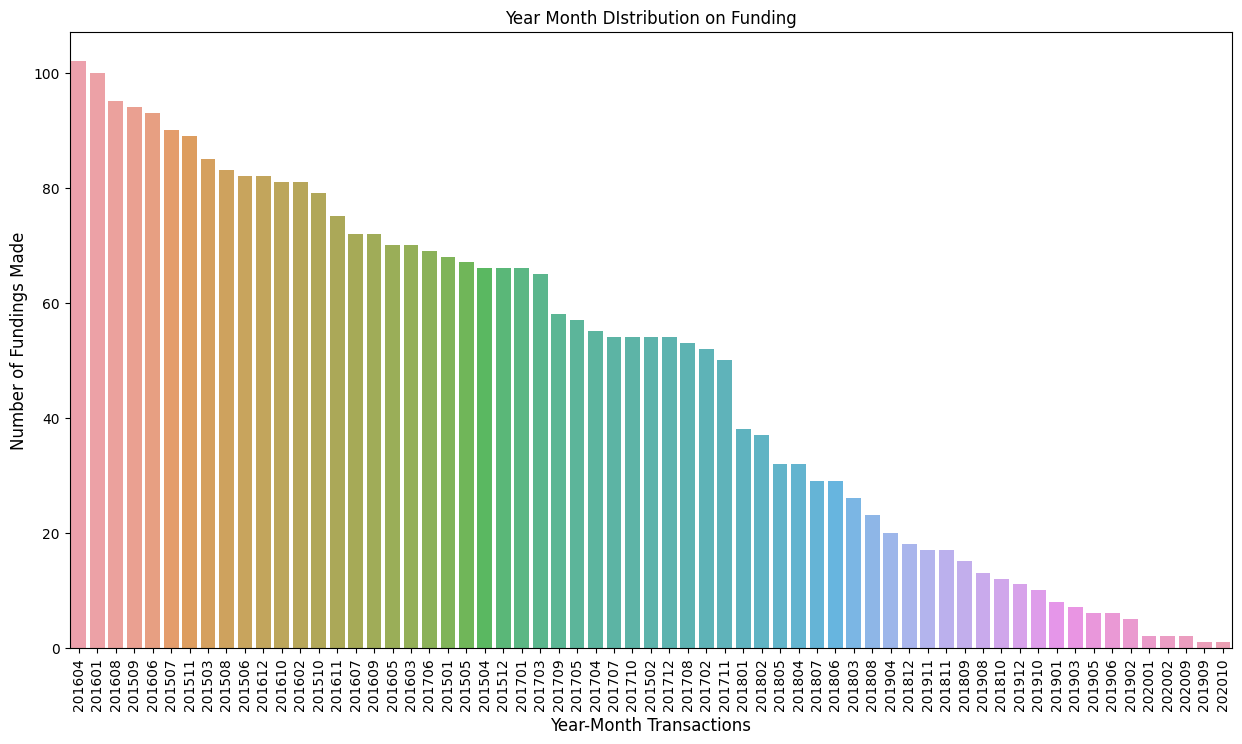

In [28]:
plt.figure(figsize=(15, 8))
sns.barplot(data=year_month_df,x=year_month_df.index,y=year_month_df.yearmonth,alpha=0.9,order=year_month_df.index)
plt.xticks(rotation='vertical')
plt.xlabel('Year-Month Transactions',fontsize=12)
plt.ylabel('Number of Fundings Made',fontsize=12)
plt.title('Year Month DIstribution on Funding',fontsize=12)

plt.show()

As we can see from above visualization clearly that in month of April'16 the maximum funding was given. 

### Ques 2 : How much funds does startups generally get in India ?(maximum funding, minimum funding , average funding and number of fundings)

In [29]:
print("Maximum Funding to Startup is (Amount and the Startup Name):", df['Amount in USD'].max())

Maximum Funding to Startup is (Amount and the Startup Name): 3900000000.0


In [31]:
df[df['Amount in USD']== 3900000000.0]

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,yearmonth
57,61,2019-08-27,Rapido Bike Taxi,Transportation,Bike Taxi,Bengaluru,Westbridge Capital,Series B,3.900000e+09,201908


In [34]:
print("Maximum Funding to Startup is (Amount and the Startup Name):", df['Amount in USD'].min())

Maximum Funding to Startup is (Amount and the Startup Name): 16000.0


In [33]:
df[df['Amount in USD']== 16000.0]

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,yearmonth
2996,3018,2015-01-19,Hostel Dunia,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0,201501
2997,3019,2015-01-19,Play your sport,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0,201501
2998,3020,2015-01-19,Yo Grad,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0,201501
2999,3021,2015-01-19,Enabli,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0,201501
3000,3022,2015-01-19,CBS,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0,201501


In [35]:
print("On Average indian startups got funding of : ",df["Amount in USD"].dropna().sort_values().mean())

On Average indian startups got funding of :  18453277.33473327


In [36]:
startupname=df['Startup Name'].value_counts().head(20)
df_startupname=pd.DataFrame(startupname)
df_startupname

,Startup Name
Ola Cabs,8
Swiggy,8
Paytm,7
NoBroker,6
Meesho,6
Medinfi,6
UrbanClap,6
Nykaa,6
Capital Float,5
Jugnoo,5


Total startups funded : 2441
Ola Cabs         8
Swiggy           8
Paytm            7
NoBroker         6
Meesho           6
Medinfi          6
UrbanClap        6
Nykaa            6
Capital Float    5
Jugnoo           5
Name: Startup Name, dtype: int64


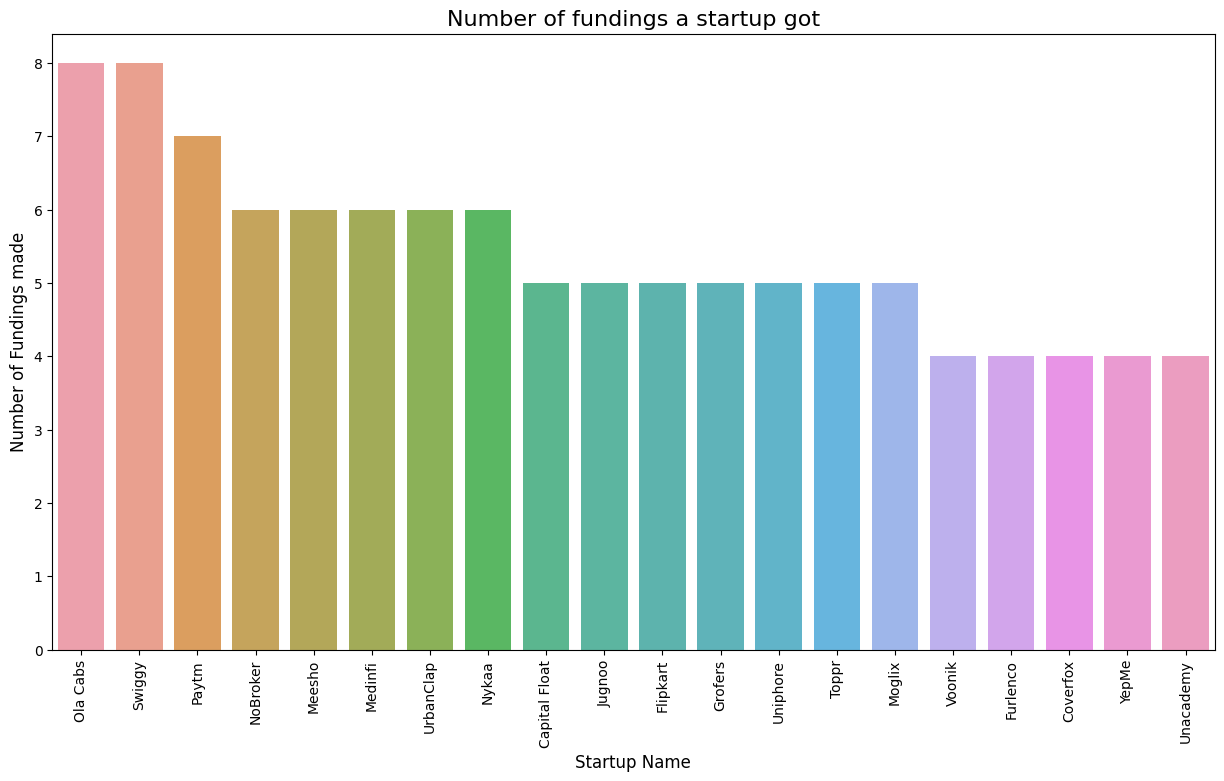

In [38]:
print("Total startups funded :", len(df['Startup Name'].unique()))
print(df["Startup Name"].value_counts().head(10))
#startupname=df['Startup Name'].value_counts().head(20)
#plt.figure(figsize=(15,8))
plt.figure(figsize=(15, 8))
sns.barplot(data=df_startupname,x=df_startupname.index,y=df_startupname['Startup Name'],alpha=0.9)
plt.xticks(rotation='vertical')
plt.xlabel('Startup Name',fontsize=12)
plt.ylabel("Number of Fundings made",fontsize=12)
plt.title('Number of fundings a startup got',fontsize=16)
plt.show()


#### So here we can see that the maximum number of fundings was got by Ola Cabs, Swiggy (Total Funding=7)

### Ques 3 : Which industries are favored by investors for funding ? (OR) Which type of companies got more easily funding ?¶

In [49]:
Industry_vertical=df['Industry Vertical'].value_counts().sort_values(ascending=False).head(10)
Industry_vertical_df=pd.DataFrame(Industry_vertical)
Industry_vertical_df

,Industry Vertical
Consumer Internet,940
Technology,478
eCommerce,186
Healthcare,70
Finance,62
ECommerce,61
Logistics,32
E-Commerce,29
Education,24
Food & Beverage,23


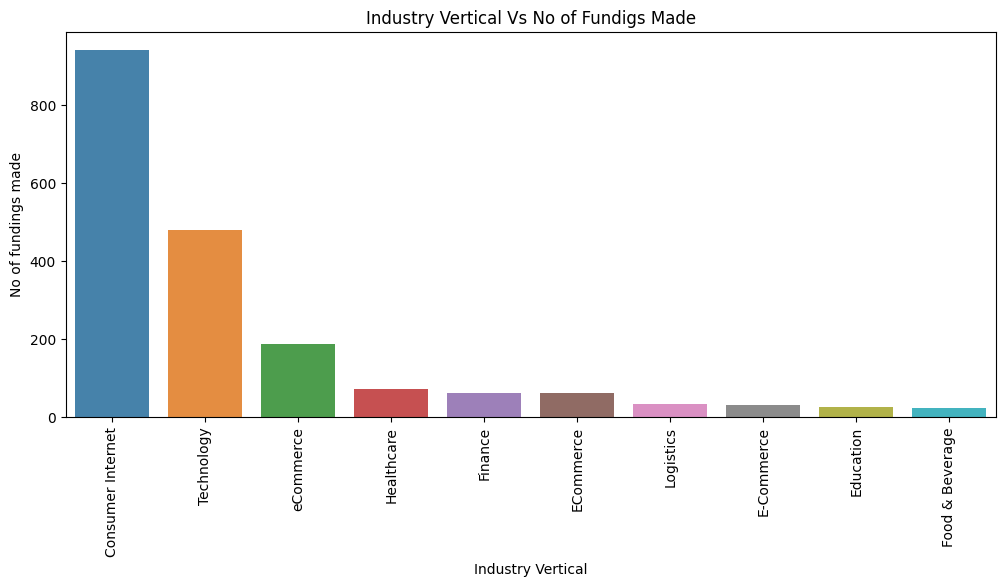

In [50]:
plt.figure(figsize=(12,5))
sns.barplot(data=Industry_vertical_df,x=Industry_vertical_df.index,y=Industry_vertical_df['Industry Vertical'],alpha=0.9)
plt.xticks(rotation='vertical')
plt.xlabel("Industry Vertical",fontsize=10)
plt.ylabel("No of fundings made",fontsize=10)
plt.title("Industry Vertical Vs No of Fundigs Made")
plt.show()


#### As per above graph, Consumer Internet, Technology, ecommerce sectors are getting higher fundings

### Ques 4 : Do cities play a major role in funding ? (OR) Which city has maximum startups ?

In [51]:
df.columns

Index(['Sr No', 'Date dd/mm/yyyy', 'Startup Name', 'Industry Vertical',
       'SubVertical', 'City  Location', 'Investors Name', 'InvestmentnType',
       'Amount in USD', 'yearmonth'],
      dtype='object')

In [61]:
city.index

Index(['Bangalore', 'Mumbai', 'New Delhi', 'Gurgaon', 'Bengaluru', 'Pune',
       'Hyderabad', 'Chennai', 'Noida', 'Gurugram', 'Ahmedabad', 'Delhi',
       'Jaipur', 'Kolkata', 'Indore', 'Chandigarh', 'Vadodara', 'Goa',
       'Singapore', 'Coimbatore'],
      dtype='object')

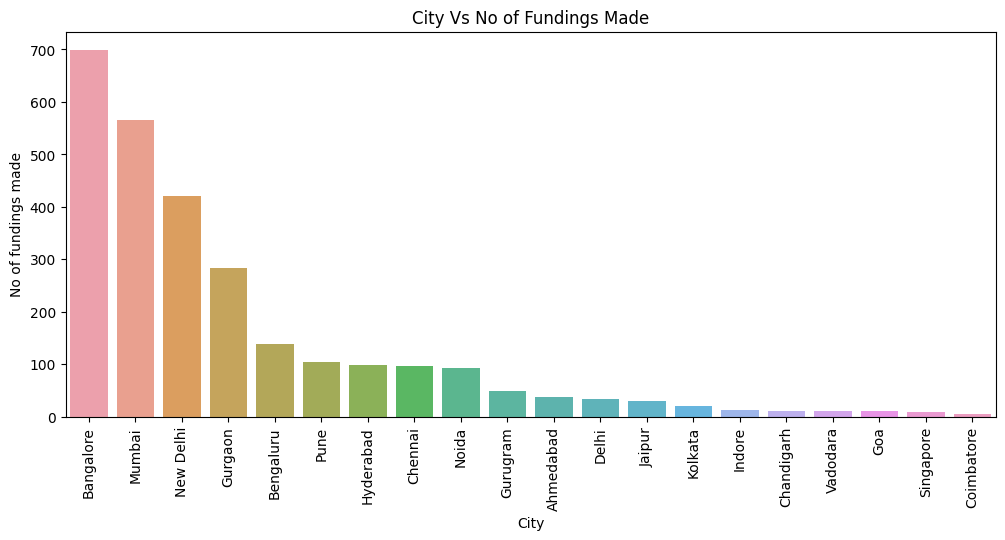

In [63]:
city=df['City  Location'].value_counts().head(20)
plt.figure(figsize=(12,5))
sns.barplot(x=city.index,y=city.values,alpha=0.9)
plt.xticks(rotation='vertical')
plt.xlabel("City",fontsize=10)
plt.ylabel("No of fundings made",fontsize=10)
plt.title("City Vs No of Fundings Made")
plt.show()

Most of Funded Startups are from Banglore city followed by Mumbai & New Delhi

### Ques 5 : Who is the important investors in the Indian Ecosystem?

In [70]:
from wordcloud import WordCloud

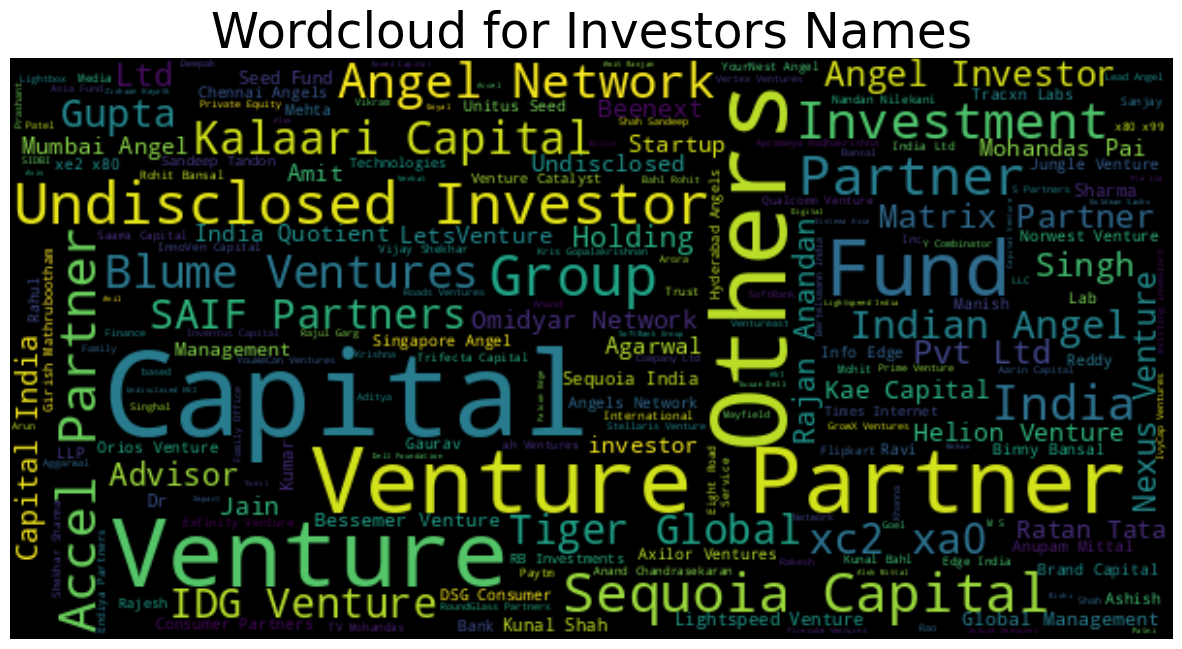

In [75]:
Investors_name=df['Investors Name'][~pd.isnull(df['Investors Name'])]
from wordcloud import WordCloud
wordcloud=WordCloud(max_font_size=60,width=600,height=300).generate(" ".join(Investors_name))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Wordcloud for Investors Names",fontsize=35)
plt.axis("off")
plt.show()